# Introduction to qiskit

In this example we will learn how to create a Qiskit account and run our first quantum circuit.

Qiskit is an open-source quantum computing framework developed by IBM Quantum that allows users to design, simulate, and execute quantum circuits on real quantum hardware and simulators. It provides tools for working with quantum algorithms, quantum gates, and quantum machine learning.

First, we have to create an account at https://quantum.ibm.com/


![image.png](Createaccount.JPG)

Then, we install the qiskit library using pip: ```qiskit@upm:~$ pip install qiskit```

In [1]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

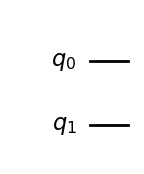

In [11]:
num_qubits = 2 ## Number of qubits
qc = QuantumCircuit(num_qubits) ## We create a Quantum circuit with num_qubits
qc.draw("mpl", style="bw")  ## Draw the circuit


Qubits are always inizialized in the state $\ket{0}$. 

We can apply different gates to each qubit:

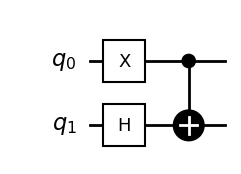

In [12]:
qc.x(0) ## X Gate to qubit 0
qc.h(1) ## Hadamard Gate to qubit 1
qc.cx(0,1) ## CNOT gate between qubit 0 (control) and 1 (target)
qc.draw("mpl", style="bw")

## Measurements

To measure a qubit we need to project it in the Pauli basis, known as observables

**IMPORTANT** The order of the observables are reversed, i.e. to measure qubit 0 in the Z basis we have to define the observable IZ 

In [13]:
from qiskit.quantum_info import SparsePauliOp

## Observables ZZ and IZ
observables = [SparsePauliOp('Z'*num_qubits),SparsePauliOp('I'*(1)+'Z'*(num_qubits-1))] 

print(observables)

[SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['IZ'],
              coeffs=[1.+0.j])]


# Run our qubit in a quantum computer

To run our circuit in an actual quantum device, we have to add our API token 

![Token.JPG](Token.JPG)

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Cloud account on disk
# token = ''  # <== Use your token here
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=token)

## Select a quantum computer

IBM have different quantum computers, each one in different location and with different number of qubits. 

![IBM computers.JPG](IBMcomputers.JPG)


In this example we will use 'ibm_sherbrooke'

![Sherbrooke.JPG](Sherbrooke.JPG)

As we can see, IBM quantum computers, like most quantum technologies, only allow local interactions between qubits. This means that a qubit can only interact with its neighboring qubits, for example the qubit number 20 (top-left) can only interacts with qubits 19, 21 and 33.

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService()
backend = service.backend('') ## Quantum Computer---> ibm_sherbrooke
print(backend)

<IBMBackend('ibm_sherbrooke')>


## Quantum Simulation:

In [ ]:
## Definition of the quantum circuit

def UPMCircuit(num_qubits, steps):

    circuit = QuantumCircuit(num_qubits) ## Create the quantum circuit with num_qubits

    ## We initialize all the qubits in the state $\ket{1}$
    for qubit in range(num_qubits):
            circuit.x(qubit)

    for step in range(steps):
        
        ## Apply a Z gate to each qubit
        for qubit in range(num_qubits):
                circuit.z(qubit)

        ##Apply a CNOT gate (qc.cx) using the even qubits as control and odd qubits as tarjet
        for qubit in range(0, num_qubits - 1, 2):
            circuit.cx(qubit, qubit + 1)

        ##Apply a CNOT gate using the odd qubits as control and even qubits as tarjet
        for qubit in range(1, num_qubits - 1, 2):
            circuit.cx(qubit, qubit + 1)
                 
    return circuit

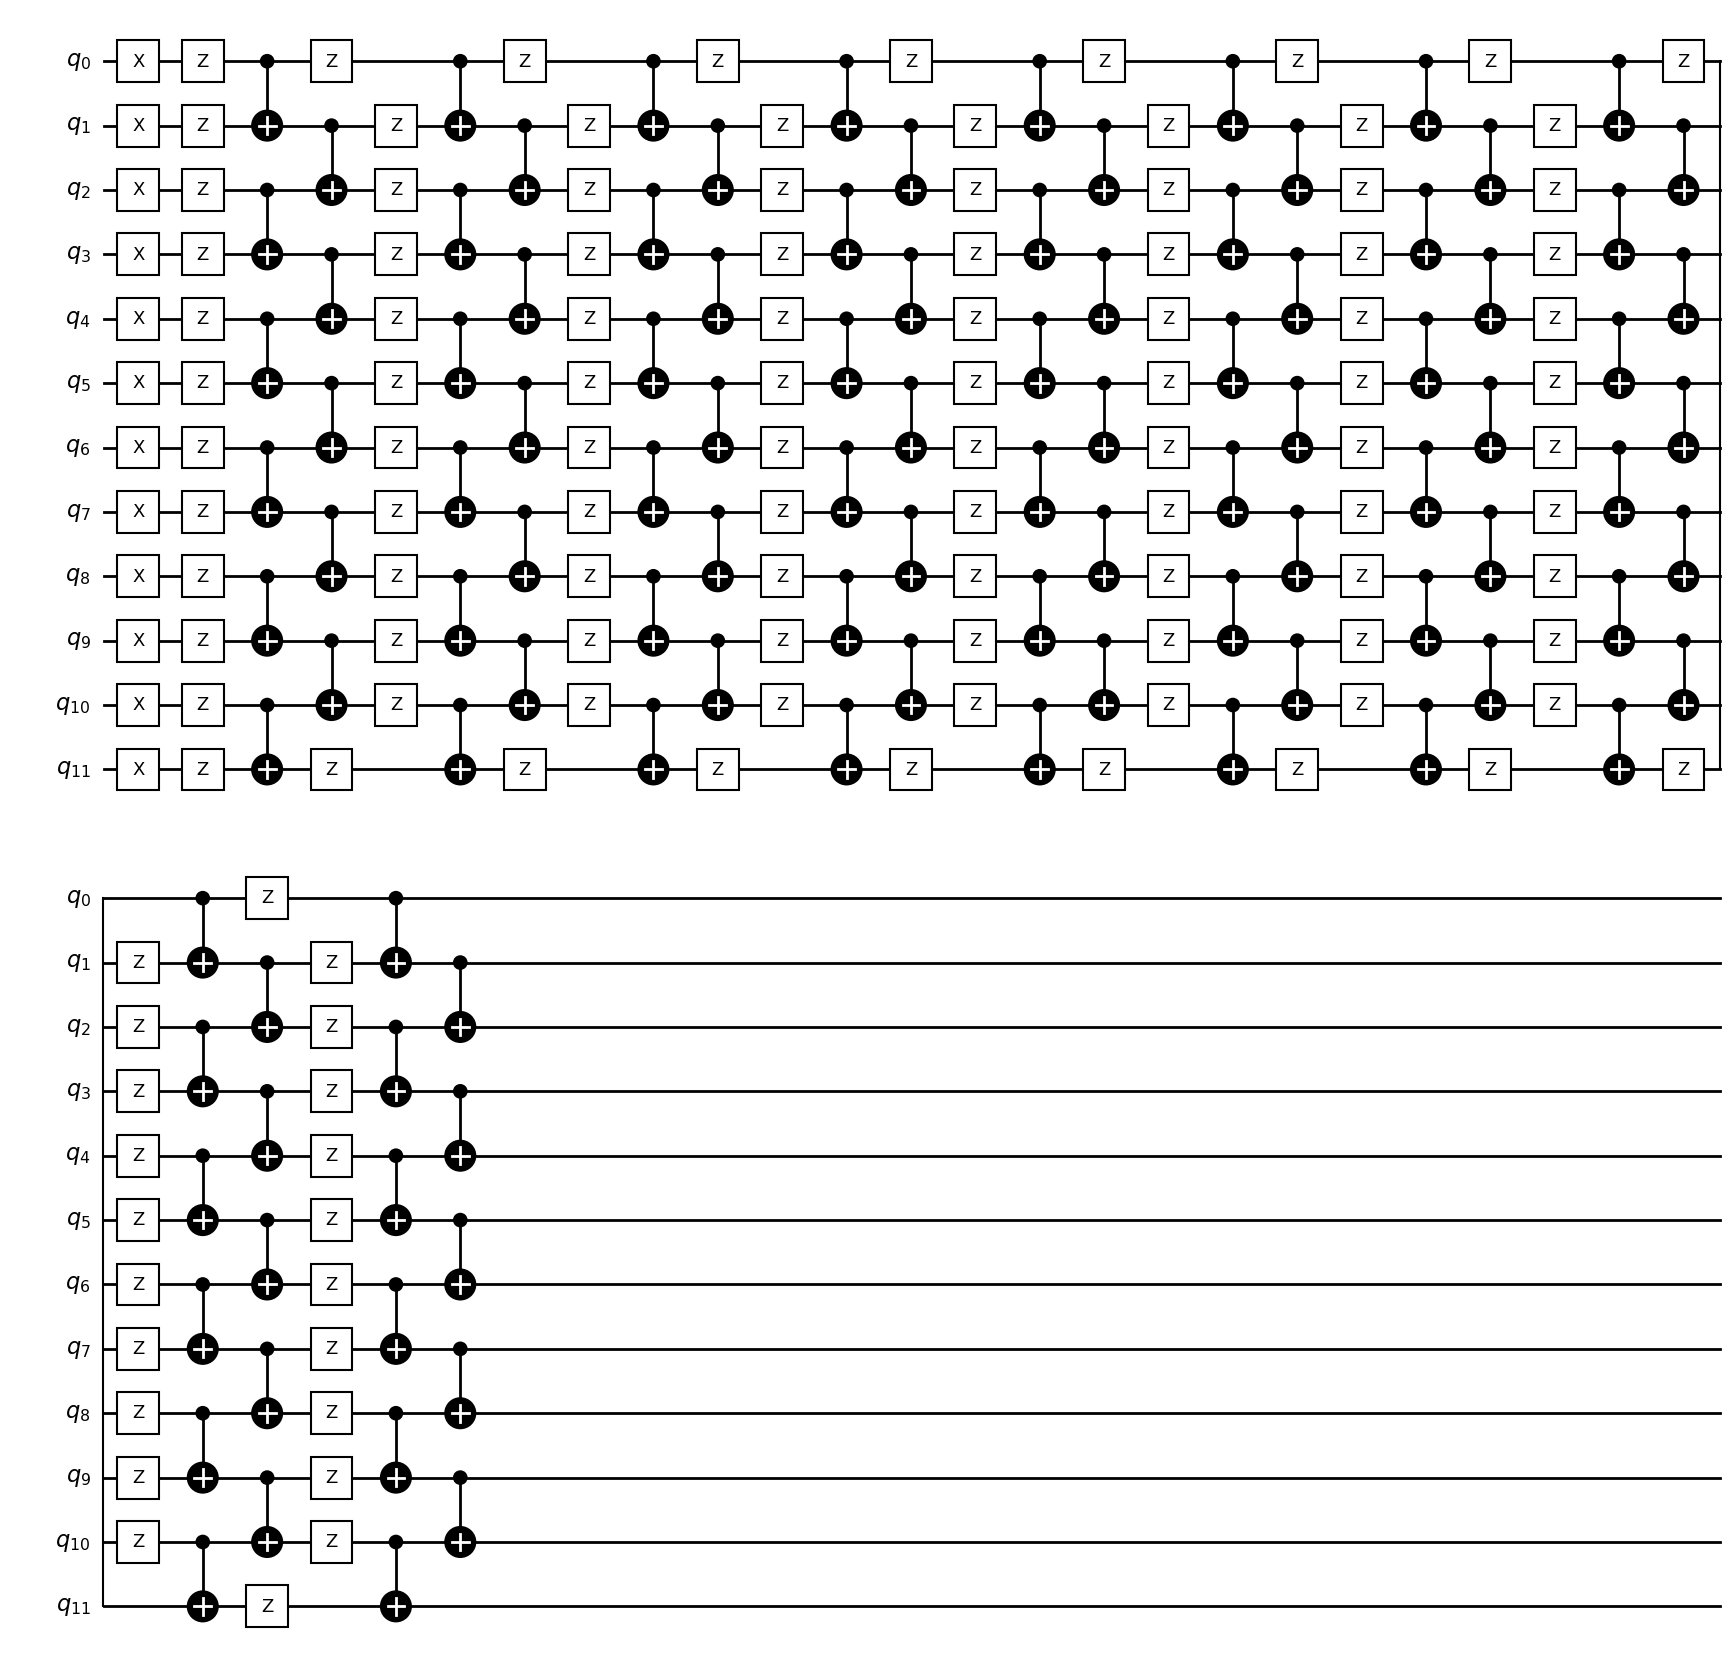

In [5]:
### Number of qubits and steps
num_qubits = 12 
num_steps = 10

### We create the Quantum Circuit
qc = UPMCircuit(num_qubits=num_qubits, steps=num_steps)

#### DRAW THE CIRCUIT 

qc.draw("mpl", style="bw")

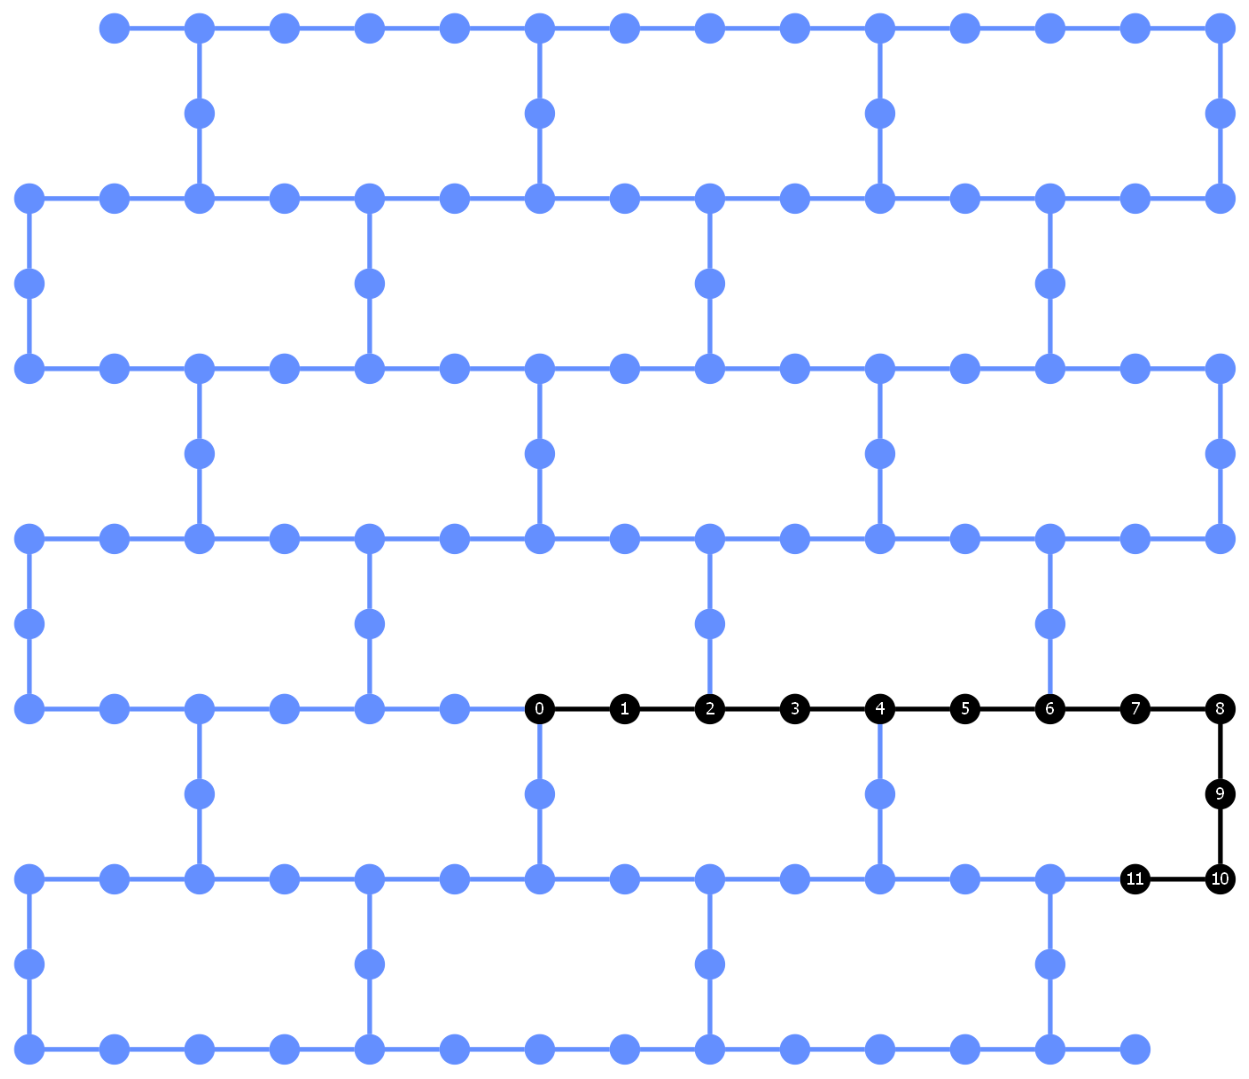

In [ ]:
## This is to transpile the quantum circuit in qiskit to the computer

pass_manager = generate_preset_pass_manager(
    backend=backend, optimization_level=2, seed_transpiler=1234,
)
circuits = pass_manager.run(qc)

# Let's visualize this on the HW

from qiskit.visualization import plot_circuit_layout

#  PLOT THE QUANTUM CIRCUIT

# plot_circuit_layout(circuits, backend)

In [8]:
from qiskit.quantum_info import SparsePauliOp
## We create a list with the observables. 
observables = [SparsePauliOp('Z'*(1)+'I'*(num_qubits-1)),SparsePauliOp('I'+'Z'+'I'*(num_qubits-2)),SparsePauliOp('I'*2+'Z'+'I'*(num_qubits-3)),SparsePauliOp('I'*(num_qubits-3)+'X'+'I'*(2)), SparsePauliOp('I'*(num_qubits-3)+'Z'+'I'*(2)) ] 
observables

[SparsePauliOp(['ZIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IZIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIZIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIXII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIZII'],
               coeffs=[1.+0.j])]

In [9]:
## We need to match the observables with the qubits of the quantum computer represented above (Quantum computer has 127 qubits)
quantum_observables = [observable.apply_layout(circuits.layout) for observable in observables] 

## Quantum observables in the quatum computer (Quantum computer has 127 qubits)
quantum_observables

[SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
               coeffs=[1.+0.j])]

## Simulation in the Quantum Computer

Quantum mechanics is not deterministic; it is based on the probability of an event occurring or not. To run an algorithm on a quantum computer, we must execute the quantum circuit multiple times. The more repetitions, the more precise the result. In our example we will run the circuit and measure the qubits 10.000 times.

Qubits suffer from decoherence due to interactions with their environment, and quantum gates are not ideal due to technological limitations. As a result, the expectation values obtained from a quantum computer may be inaccurate. However, certain classical post-processing techniques can help mitigate these errors such as Zero Noise Extrapolation (ZNE)

In [ ]:
from qiskit_ibm_runtime import Batch, EstimatorV2, EstimatorOptions
q_comp=[]

q_comp.append([circuits, quantum_observables])
jobs_Noisy= []
jobs_Mitigated = []

session_ids = []

for q_compext in q_comp:

    with Batch(backend=backend) as batch:
        
        session_ids.append(batch.session_id)

        options = EstimatorOptions(default_shots=10_000, resilience_level=0) ##  We run the quantum circuit 10.000 times



        # Run job_Noisy with no error mitigation

        options.dynamical_decoupling.enable = True
        options.dynamical_decoupling.sequence_type = "XpXm" 
        estimator = EstimatorV2(mode=batch, options=options)

        ### Noisy experiment

        job_Noisy = estimator.run([q_compext])
        jobs_Noisy.append(job_Noisy.job_id())
        


        ## Add Error mitigation: Qubits suffer decoherence
        options.resilience.measure_mitigation = True
        options.twirling.enable_gates = True
        options.resilience.zne_mitigation = True
        options.resilience.zne.amplifier = ("gate_folding'") 
        options.resilience.zne.noise_factors = (1,3,5)
        options.resilience.zne.extrapolator = ("exponential", "linear")
        estimator = EstimatorV2(mode=batch, options=options)

        ### Mitigated experiment

        job_Mitigated = estimator.run([q_compext])
        jobs_Mitigated.append(job_Mitigated.job_id())

        np.save(f'UPM_Tutorial_Noisy1.npy', jobs_Noisy)
        np.save(f'UPM_Tutorial_Mitigated1.npy', jobs_Mitigated)
        



## Plot the results

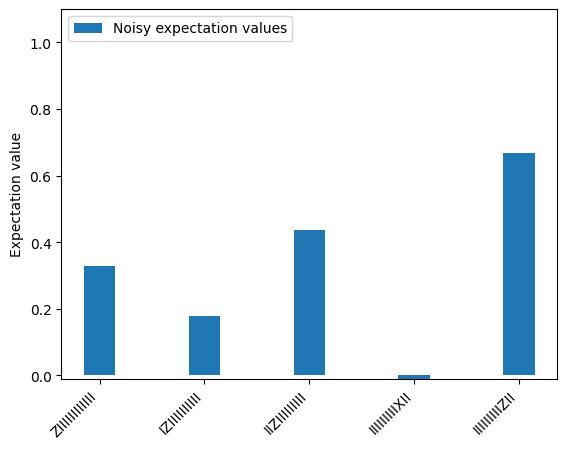

In [40]:

jobs_noisy_ids = np.load(f'UPM_Tutorial_Noisy1.npy', allow_pickle=True)


# Load job results
job = service.job(jobs_noisy_ids[0]) 
results = job.result()

# Extract expectation values
pub_result = results[0]  # 
expectation_vals = np.array(pub_result.data.evs)  # Extract evs directly

# Define labels
labels = ["ZIIIIIIIIIIII", "IZIIIIIIIIII", "IIZIIIIIIIII", "IIIIIIIIIXII", "IIIIIIIIIZII"]

# Create bar plot
fig, ax = plt.subplots()
x_positions = range(len(labels))  # X positions for bars
ax.bar(x_positions, expectation_vals, label="Noisy expectation values", width=0.3)

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha="right")  # Rotate labels for readability

# Set labels and legend
ax.set_ylabel("Expectation value")
ax.legend(loc="upper left")

ax.set_ylim(-0.01,1.1)
plt.show()


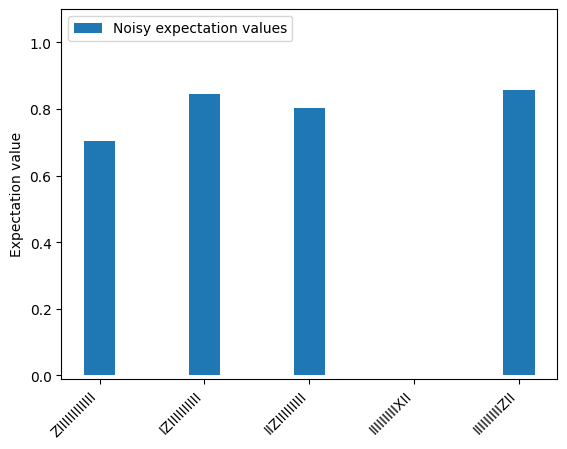

In [39]:

jobs_mitigated_ids = np.load(f'UPM_Tutorial_Mitigated1.npy', allow_pickle=True)

# Load job results
job = service.job(jobs_mitigated_ids[0]) 
results = job.result()

# Extract expectation values
pub_result = results[0]  # 
expectation_vals = np.array(pub_result.data.evs)  # Extract evs directly

# Define labels
labels = ["ZIIIIIIIIIIII", "IZIIIIIIIIII", "IIZIIIIIIIII", "IIIIIIIIIXII", "IIIIIIIIIZII"]

# Create bar plot
fig, ax = plt.subplots()
x_positions = range(len(labels))  # X positions for bars
ax.bar(x_positions, expectation_vals, label="Noisy expectation values", width=0.3)

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha="right")  # Rotate labels for readability

# Set labels and legend
ax.set_ylabel("Expectation value")
ax.legend(loc="upper left")

ax.set_ylim(-0.01,1.1)
plt.show()

In the figure above, we can see a change in the expected values of the observables. This is because we have reduced the effect of noise through the use of zero noise extrapolation. They are not the ideal results, but through this technique, we are able to improve the obtained outcome. 

"Error Mitigation for Short-Depth Quantum Circuits" K. Temme, S. Bravyi, and J. M. Gambetta, Phys. Rev.Lett. 119, 180509 (2017).